In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [3]:
#Total Number of Customers

Default = pd.read_csv('C:/Users/yuntong/Desktop/Data mining/data/default_of_credit_card_clients.csv', skiprows = 1)

Default = Default.iloc[:, 1:]

Default = Default.rename(columns={"default payment next month": "Default_Payment"})

print("Number of Observations in adult dataset:", Default.shape)

Default.head()

Number of Observations in adult dataset: (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Most Common Sex in the dataset

print(Default['SEX'].value_counts())

print(Default['SEX'].value_counts(normalize=True) * 100)

2    18112
1    11888
Name: SEX, dtype: int64
2    60.373333
1    39.626667
Name: SEX, dtype: float64


Most common is female

#### Default by Sex

In [5]:
#Checking which Sex has the most defaults

print(Default['SEX'].loc[Default['Default_Payment'] == 1].value_counts())

Default['SEX'].loc[Default['Default_Payment'] == 1].value_counts(normalize=True) * 100

2    3763
1    2873
Name: SEX, dtype: int64


2    56.705847
1    43.294153
Name: SEX, dtype: float64

Females have more defaults than males

#### Marriage is a categorical column, hence figuring out how many levels does this factor have

In [6]:
#Distinct Values and their frequency in the marriage column!!!

print(Default.MARRIAGE.unique())

Default.MARRIAGE.value_counts()

[1 2 3 0]


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Marriage has 4 distinct values. Based on the metadata, we convert it into 3.

In [7]:
Default['MARRIAGE'].replace(0, 3, inplace = True)
Default['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

#### Visualizations to establish first impressions and correlations

##### Bill Amount 1 Vs. Sex

<AxesSubplot:xlabel='SEX', ylabel='BILL_AMT1'>

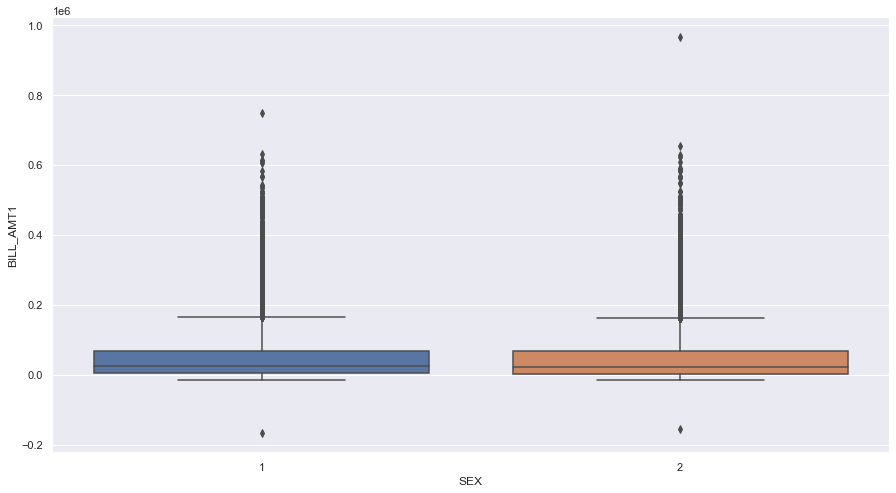

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x="SEX", y="BILL_AMT1", data=Default)

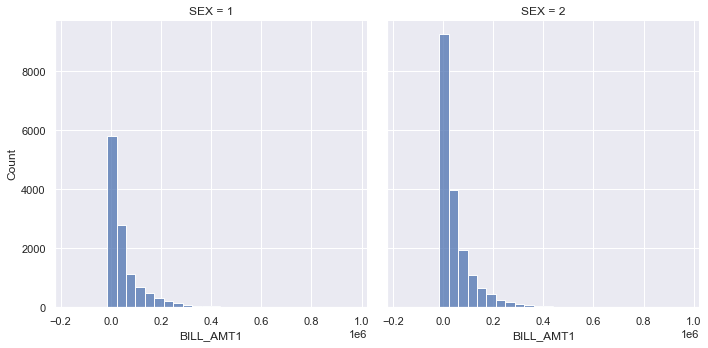

In [9]:
sns.displot(Default, x="BILL_AMT1", col="SEX", bins=30)

##### Visualizing changes in default with age

<AxesSubplot:xlabel='Default_Payment', ylabel='AGE'>

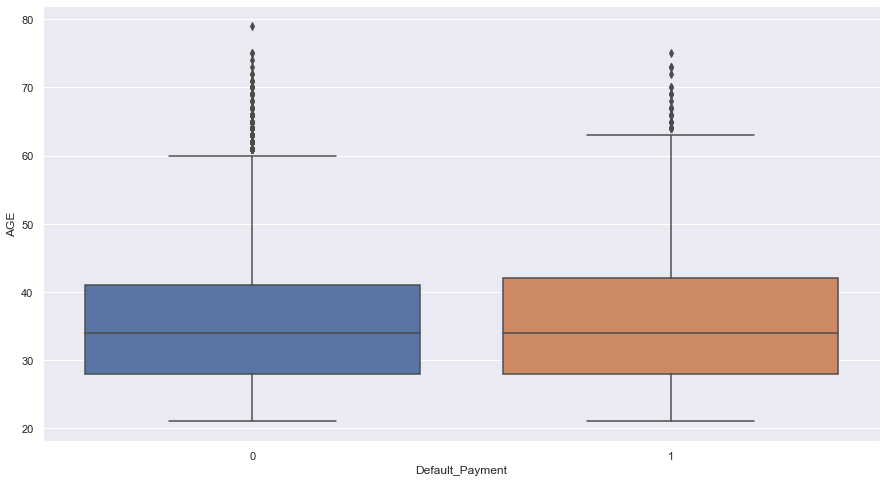

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x="Default_Payment", y="AGE", data=Default)

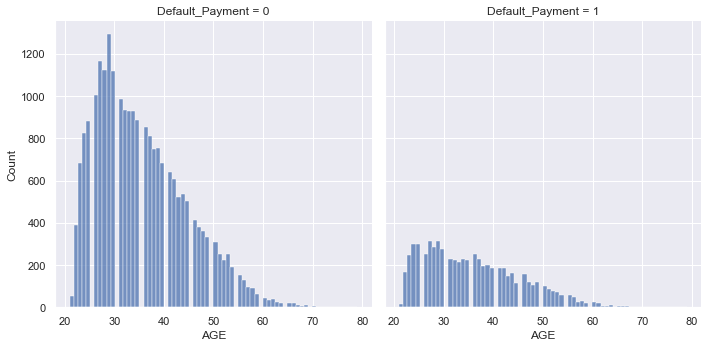

In [10]:
sns.displot(Default, x="AGE", col="Default_Payment")

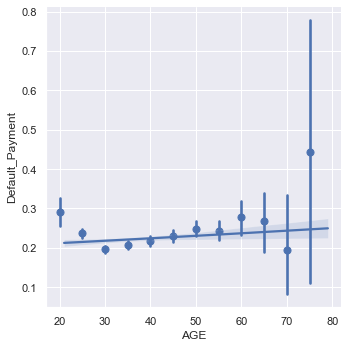

In [12]:
sns.lmplot(x='AGE', y='Default_Payment', data = Default, logistic=True, x_bins=np.arange(20,80, 5))

There appears to be no relationship between default and AGE

### Machine Learning Models

### KNN Model

In [12]:
X = Default.drop("Default_Payment", axis=1)
X = X.values
Y = Default["Default_Payment"]
y = Y.values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors': range(5,10),
                 }

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

knn = grid_obj.best_estimator_

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

We use GridSearchCV to systematically traverse multiple parameter combinations and finally determine the best effect parameters through cross validation.
We decided to choose k = 8.

<font color = blue>Q3.2 Score the validation data (predict) using the model. Produce a confusion table and an ROC for the scored validation data. </font>

In [16]:
knn_predict = knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

80.0

In [17]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, knn_predict)

print(cm_knn)

print('\nTrue Positives(TP) = ', cm_knn[0,0])

print('\nTrue Negatives(TN) = ', cm_knn[1,1])

print('\nFalse Positives(FP) = ', cm_knn[0,1])

print('\nFalse Negatives(FN) = ', cm_knn[1,0])

from sklearn.metrics import classification_report

print(classification_report(y_test, knn_predict))


[[6687  240]
 [1888  185]]

True Positives(TP) =  6687

True Negatives(TN) =  185

False Positives(FP) =  240

False Negatives(FN) =  1888
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      6927
           1       0.44      0.09      0.15      2073

    accuracy                           0.76      9000
   macro avg       0.61      0.53      0.51      9000
weighted avg       0.70      0.76      0.70      9000



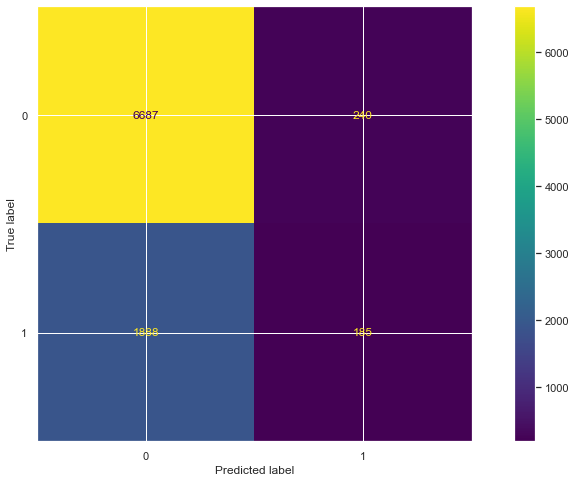

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()
plt.show()

ROC AUC : 0.6304


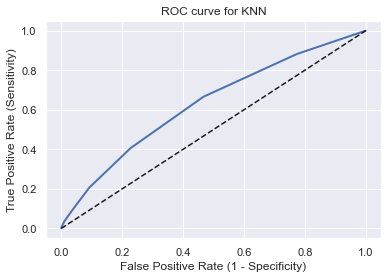

In [19]:
from sklearn.metrics import roc_auc_score

y_prob_pred = knn.predict_proba(X_test)[:, 1]

ROC_AUC = roc_auc_score(y_test, y_prob_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for KNN')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### Calculating Metrics from the Confusion Table

In [20]:
total1=sum(sum(cm_knn))
#####from confusion matrix calculate accuracy
accuracy1=(cm_knn[0,0]+cm_knn[1,1])/total1
print ('Accuracy : ', accuracy1)

precision1=(cm_knn[0,0])/(cm_knn[0,0] + cm_knn[1,0])
print ('Precision : ', precision1)
            
print ('Misclassification : ', 1-accuracy1)

sensitivity1 = cm_knn[0,0]/(cm_knn[0,0]+cm_knn[1,0])
print('Sensitivity/True Positive Rate : ', sensitivity1)

specificity1 = 1-(cm_knn[1,1]/(cm_knn[0,1]+cm_knn[1,1]))
print('1-specificity/False Positive Rate : ', specificity1)

prevalence1 = (cm_knn[0,0])/total1
print('Prevalence : ', prevalence1)

Accuracy :  0.7635555555555555
Precision :  0.7798250728862973
Misclassification :  0.23644444444444446
Sensitivity/True Positive Rate :  0.7798250728862973
1-specificity/False Positive Rate :  0.5647058823529412
Prevalence :  0.743


### K-Means Clustering

Two steps :
    1. Create clusters based on age using K-Means Clustering,
    2. Use KNN to classify each of those separate clusters

In [21]:
X_2 = Default.loc[:,["AGE"]].values

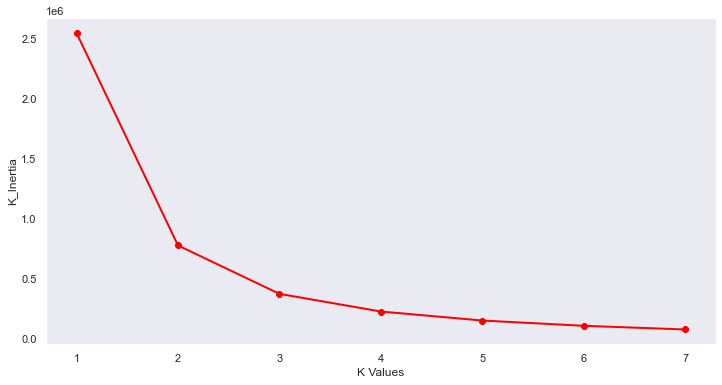

In [22]:
from sklearn.cluster import KMeans

age_ss = []

for k in range(1,8):

    kmeans = KMeans(n_clusters=k, init='k-means++')

    kmeans.fit(X_2)

    age_ss.append(kmeans.inertia_)



plt.figure(figsize=(12,6))

plt.grid()

plt.plot(range(1,8),age_ss,linewidth = 2, color = "red", marker = "8")

plt.xlabel('K Values')

plt.ylabel("K_Inertia")

plt.show()

From the elbow curve it's evident that after K=3, the reduction in distance greatly decreases, hence we'll set K=3, i.e number of clusters = 3

### We'll now build a KNN model for all the 3 clusters

In [23]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X_2)



In [31]:
Default2 = Default

Default2["Cluster"] = label

Cluster1 = Default2[Default2["Cluster"] == 0]
Cluster1 = Cluster1.drop("Cluster", axis=1)

Cluster2 = Default2[Default2["Cluster"] == 1]
Cluster2 = Cluster2.drop("Cluster", axis=1)

Cluster3 = Default2[Default2["Cluster"] == 2]
Cluster3 = Cluster3.drop("Cluster", axis=1)

In [32]:
X1 = Cluster1.drop("Default_Payment", axis=1)
X1 = X1.values
Y1 = Cluster1["Default_Payment"]
y1 = Y1.values

X2 = Cluster2.drop("Default_Payment", axis=1)
X2 = X2.values
Y2 = Cluster2["Default_Payment"]
y2 = Y2.values

X3 = Cluster3.drop("Default_Payment", axis=1)
X3 = X3.values
Y3 = Cluster3["Default_Payment"]
y3 = Y3.values

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=100)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=100)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=100)

In [34]:
knn1 = KNeighborsClassifier()
knn1_parameters = {'n_neighbors': range(5,10),
                 }

acc_scorer1 = make_scorer(accuracy_score)

grid_obj1 = GridSearchCV(knn1, knn1_parameters, cv = 10, scoring = acc_scorer1)
grid_obj1 = grid_obj1.fit(X_train1, y_train1)

knn1 = grid_obj1.best_estimator_

knn1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=8)

In [35]:
knn2 = KNeighborsClassifier()
knn2_parameters = {'n_neighbors': range(5,10),
                 }

acc_scorer2 = make_scorer(accuracy_score)

grid_obj2 = GridSearchCV(knn2, knn2_parameters, cv = 10, scoring = acc_scorer2)
grid_obj2 = grid_obj2.fit(X_train2, y_train2)

knn2 = grid_obj2.best_estimator_

knn2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=8)

In [36]:
knn3 = KNeighborsClassifier()
knn3_parameters = {'n_neighbors': range(5,10),
                 }

acc_scorer3 = make_scorer(accuracy_score)

grid_obj3 = GridSearchCV(knn3, knn3_parameters, cv = 10, scoring = acc_scorer3)
grid_obj3 = grid_obj3.fit(X_train3, y_train3)

knn3 = grid_obj3.best_estimator_

knn3.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=6)

We use GridSearchCV to systematically traverse multiple parameter combinations and finally determine the best effect parameters through cross validation.
For cluster1, we choose k = 8;
for cluster2, we choose k = 8;
for cluster3, we choose k = 6.

In [37]:
knn_predict1 = knn1.predict(X_test1)
print(round(knn1.score(X_train1, y_train1) * 100, 2))

77.97


In [38]:
knn_predict2 = knn2.predict(X_test2)
print(round(knn2.score(X_train2, y_train2) * 100, 2))

79.88


In [46]:
knn_predict3 = knn3.predict(X_test3)
print(round(knn3.score(X_train3, y_train3) * 100, 2))

80.93


In [47]:
cm_knn1 = confusion_matrix(y_test1, knn_predict1)

print('Confusion matrix_1\n\n', cm_knn1)

print('\nTrue Positives(TP) = ', cm_knn1[0,0])

print('\nTrue Negatives(TN) = ', cm_knn1[1,1])

print('\nFalse Positives(FP) = ', cm_knn1[0,1])

print('\nFalse Negatives(FN) = ', cm_knn1[1,0])

print(classification_report(y_test1, knn_predict1))


Confusion matrix_1

 [[1117   67]
 [ 364   38]]

True Positives(TP) =  1117

True Negatives(TN) =  38

False Positives(FP) =  67

False Negatives(FN) =  364
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1184
           1       0.36      0.09      0.15       402

    accuracy                           0.73      1586
   macro avg       0.56      0.52      0.49      1586
weighted avg       0.65      0.73      0.66      1586



In [48]:
cm_knn2 = confusion_matrix(y_test2, knn_predict2)

print('Confusion matrix_2\n\n', cm_knn2)

print('\nTrue Positives(TP) = ', cm_knn2[0,0])

print('\nTrue Negatives(TN) = ', cm_knn2[1,1])

print('\nFalse Positives(FP) = ', cm_knn2[0,1])

print('\nFalse Negatives(FN) = ', cm_knn2[1,0])

print(classification_report(y_test2, knn_predict2))


Confusion matrix_2

 [[3016   94]
 [ 826   81]]

True Positives(TP) =  3016

True Negatives(TN) =  81

False Positives(FP) =  94

False Negatives(FN) =  826
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      3110
           1       0.46      0.09      0.15       907

    accuracy                           0.77      4017
   macro avg       0.62      0.53      0.51      4017
weighted avg       0.71      0.77      0.71      4017



In [52]:
cm_knn3 = confusion_matrix(y_test3, knn_predict3)

print('Confusion matrix_3\n\n', cm_knn3)

print('\nTrue Positives(TP) = ', cm_knn3[0,0])

print('\nTrue Negatives(TN) = ', cm_knn3[1,1])

print('\nFalse Positives(FP) = ', cm_knn3[0,1])

print('\nFalse Negatives(FN) = ', cm_knn3[1,0])

print(classification_report(y_test3, knn_predict3))

Confusion matrix_3

 [[2602  110]
 [ 611   75]]

True Positives(TP) =  2602

True Negatives(TN) =  75

False Positives(FP) =  110

False Negatives(FN) =  611
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2712
           1       0.41      0.11      0.17       686

    accuracy                           0.79      3398
   macro avg       0.61      0.53      0.53      3398
weighted avg       0.73      0.79      0.74      3398



In [54]:
Total2=sum(sum(cm_knn1))
Accuracy2=(cm_knn1[0,0]+cm_knn1[1,1])/Total2
print ('Accuracy : ', Accuracy2)

Precision2=(cm_knn1[0,0])/(cm_knn1[0,0] + cm_knn1[1,0])
print ('Precision : ', Precision2)
            
print ('Misclassification : ', 1-Accuracy2)

Sensitivity2 = cm_knn1[0,0]/(cm_knn1[0,0]+cm_knn1[1,0])
print('Sensitivity/True Positive Rate : ', Sensitivity2)

Specificity2 = cm_knn1[0,1]/(cm_knn1[0,1]+cm_knn1[1,1])
print('1-Specificity/False Positive Rate : ', Specificity2)

Prevalence2 = (cm_knn1[0,0])/Total2
print('Prevalence : ', Prevalence2)

Accuracy :  0.7282471626733922
Precision :  0.7542201215395004
Misclassification :  0.2717528373266078
Sensitivity/True Positive Rate :  0.7542201215395004
1-Specificity/False Positive Rate :  0.638095238095238
Prevalence :  0.7042875157629256


In [55]:
Total3=sum(sum(cm_knn2))
Accuracy3=(cm_knn2[0,0]+cm_knn2[1,1])/Total3
print ('Accuracy : ', Accuracy3)

Precision3=(cm_knn2[0,0])/(cm_knn2[0,0] + cm_knn2[1,0])
print ('Precision : ', Precision3)
            
print ('Misclassification : ', 1-Accuracy3)

Sensitivity3 = cm_knn2[0,0]/(cm_knn2[0,0]+cm_knn2[1,0])
print('Sensitivity/True Positive Rate : ', Sensitivity3)

Specificity3 = cm_knn2[0,1]/(cm_knn2[0,1]+cm_knn2[1,1])
print('1-Specificity/False Positive Rate : ', Specificity3)

Prevalence3 = (cm_knn2[0,0])/Total3
print('Prevalence : ', Prevalence3)

Accuracy :  0.7709733632063729
Precision :  0.7850078084331078
Misclassification :  0.22902663679362711
Sensitivity/True Positive Rate :  0.7850078084331078
1-Specificity/False Positive Rate :  0.5371428571428571
Prevalence :  0.7508090614886731


In [56]:
Total4=sum(sum(cm_knn3))
Accuracy4=(cm_knn3[0,0]+cm_knn3[1,1])/Total4
print ('Accuracy : ', Accuracy4)

Precision4=(cm_knn3[0,0])/(cm_knn3[0,0] + cm_knn3[1,0])
print ('Precision : ', Precision4)
            
print ('Misclassification : ', 1-Accuracy4)

Sensitivity4 = cm_knn3[0,0]/(cm_knn3[0,0]+cm_knn3[1,0])
print('Sensitivity/True Positive Rate : ', Sensitivity4)

Specificity4 = cm_knn3[0,1]/(cm_knn3[0,1]+cm_knn3[1,1])
print('1-Specificity/False Positive Rate : ', Specificity4)

Prevalence4 = (cm_knn3[0,0])/Total4
print('Prevalence : ', Prevalence4)

Accuracy :  0.7878163625662155
Precision :  0.8098350451291628
Misclassification :  0.21218363743378454
Sensitivity/True Positive Rate :  0.8098350451291628
1-Specificity/False Positive Rate :  0.5945945945945946
Prevalence :  0.7657445556209534


### ROC and AUC Curves

ROC AUC : 0.5943


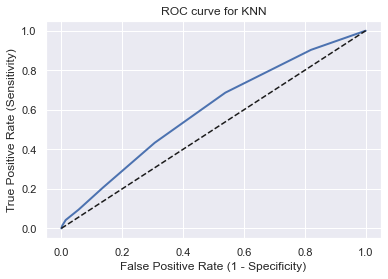

In [57]:
y_prob_pred1 = knn1.predict_proba(X_test1)[:, 1]

ROC_AUC1 = roc_auc_score(y_test1, y_prob_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC1))

fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_prob_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr1, tpr1, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for KNN')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC AUC : 0.6215


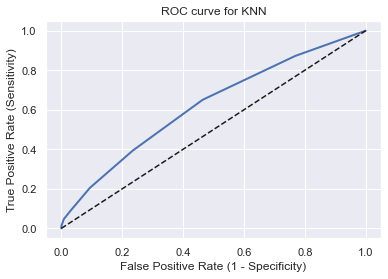

In [58]:
y_prob_pred2 = knn2.predict_proba(X_test2)[:, 1]

ROC_AUC2 = roc_auc_score(y_test2, y_prob_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC2))

fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_prob_pred2)

plt.figure(figsize=(6,4))

plt.plot(fpr2, tpr2, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for KNN')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC AUC : 0.6104


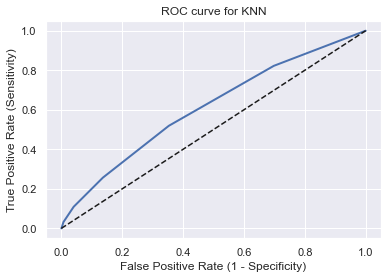

In [59]:
y_prob_pred3 = knn3.predict_proba(X_test3)[:, 1]

ROC_AUC3 = roc_auc_score(y_test3, y_prob_pred3)

print('ROC AUC : {:.4f}'.format(ROC_AUC3))

fpr3, tpr3, thresholds3 = roc_curve(y_test3, y_prob_pred3)

plt.figure(figsize=(6,4))

plt.plot(fpr3, tpr3, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for KNN')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Cluster 3 had a better classification matrix than the regular knn. Accuracy was higher, precision was higher, and while sensitivity was just a little lower it had a higher specificity

### Neural Network

Building model using Artificial Neural Network

In [61]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=100)

from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann_parameters = {'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
                  'alpha': [.0001, .001, .01, .1, 1],
                 }

acc_scorer5 = make_scorer(accuracy_score)

ann.fit(X_train5, y_train5)

MLPClassifier()

In [62]:
predictions = ann.predict(X_test5)

cm_ann = confusion_matrix(y_test5,predictions)

print(confusion_matrix(y_test5,predictions))
print(classification_report(y_test5,predictions))

[[4441 2486]
 [ 768 1305]]
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      6927
           1       0.34      0.63      0.45      2073

    accuracy                           0.64      9000
   macro avg       0.60      0.64      0.59      9000
weighted avg       0.74      0.64      0.67      9000



ROC AUC : 0.6718


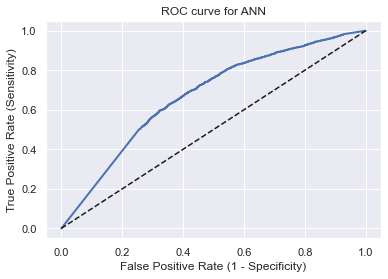

In [63]:
y_prob_pred4 = ann.predict_proba(X_test5)[:, 1]

ROC_AUC4 = roc_auc_score(y_test5, y_prob_pred4)

print('ROC AUC : {:.4f}'.format(ROC_AUC4))

fpr4, tpr4, thresholds4 = roc_curve(y_test5, y_prob_pred4)

plt.figure(figsize=(6,4))

plt.plot(fpr4, tpr4, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for ANN')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [64]:
Total5=sum(sum(cm_ann))
#####from confusion matrix calculate accuracy
Accuracy5=(cm_ann[0,0]+cm_ann[1,1])/Total5
print ('Accuracy : ', Accuracy5)

Precision5=(cm_ann[0,0])/(cm_ann[0,0] + cm_ann[1,0])
print ('Precision : ', Precision5)
            
print ('Misclassification : ', 1-Accuracy5)

Sensitivity5 = cm_ann[0,0]/(cm_ann[0,0]+cm_ann[0,1])
print('Sensitivity/True Positive Rate : ', Sensitivity5)

Specificity5 = cm_ann[1,1]/(cm_ann[1,0]+cm_ann[1,1])
print('Specificity/True Negative Rate : ', Specificity5)

Prevalence5 = (cm_ann[0,0])/Total5
print('Prevalence : ', Prevalence5)

Accuracy :  0.6384444444444445
Precision :  0.8525628719523901
Misclassification :  0.3615555555555555
Sensitivity/True Positive Rate :  0.6411144795726866
Specificity/True Negative Rate :  0.6295224312590448
Prevalence :  0.49344444444444446


<font color = blue>**Q5: Compare Models**</font>

<font color = blue>Q5.1 Of the three models, which do you prefer to use and why?</font>

In [65]:
Comparison = [[Accuracy5, Sensitivity5, Specificity5, Precision5], [Accuracy4, Sensitivity4, Specificity4, Precision4], [Accuracy3, Sensitivity3, Specificity3, Precision3], [Accuracy2, Sensitivity2, Specificity2, Precision2], [accuracy1, sensitivity1, specificity1, precision1]]

Comparison_Table = pd.DataFrame(Comparison, index = ['Neural Network', 'Cluster 3', 'Cluster2', 'Cluster 1', 'KNN'], columns = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision'])

Comparison_Table

,Accuracy,Sensitivity,Specificity,Precision
Neural Network,0.638444,0.641114,0.629522,0.852563
Cluster 3,0.787816,0.809835,0.594595,0.809835
Cluster2,0.770973,0.785008,0.537143,0.785008
Cluster 1,0.728247,0.754220,0.638095,0.754220
KNN,0.763556,0.779825,0.564706,0.779825
